In [130]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', 200)

In [131]:
data=pd.read_csv('/Volumes/Data/Dropbox/ANIP Roberto/Centro de estudios/Encuesta de insercion 2016/20170103094151-SurveyExport.csv', encoding='utf-8-sig')

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (77,80,85,86,92,102,132,135,150,151,155,160,208,213,223,224,233,234,236,239,266,267,268,269,273,278,279,286,287,288,289,292,295,301,302,306,313,315,316,323,324,325,326,331,332,333,337,338,339,340,350,353,361,364,366,369,371,376,381,382,386,387,391,392,396,397,401,402,406,411,412,416,417,421,422,426,427,431,432,437,443,444,449,452,457,465,466,467,497,498,500,501,502,503,504,505,506,508,509,510,511,512,513,517,518,522,532,542,552,559,562,569,570,585,586,587,591,593,596,643,647,648,657,658,660,661,662,664,683,684,695,696,700,702,704,706,708,722,729,731,736,737,746,747,752,753,754,756,757,758,765,766,789,790,797,798,799,800,806,808,813,819,820,821,822,824,826,835,839,840,841,845,846,849,850,852,857,861,862,867,868,869,870,871,874,879,880,881,882,889,892,893,902,908,909,920,921,934,935,938,939,940,943,944,946,947,949,950,952,955,956,958,959,961,964,966,967,970,974,976,977,980,981,983,984,986,

In [132]:
print(data.columns)

Index(['Response ID', 'Time Started', 'Date Submitted', 'Status', 'Contact ID',
       'Legacy Comments', 'Comments', 'Language', 'Referer',
       'Extended Referer',
       ...
       'Countries:Specify the countries, institutions and collaboration relationships',
       'Institutions and Organisations:Specify the countries, institutions and collaboration relationships',
       'Collaboration relationships:Specify the countries, institutions and collaboration relationships',
       'During your academic training and professional career, did you look forward to work in the academic field?',
       'Are you member of any researchers, professional or scientific association?',
       'Specify what associations you are a member of',
       'Are you interested in being contacted by the Asociación Nacional de Investigadores de Postgrado  (ANIP) and Redes Chilenas (ReCh)?',
       'Do you want to receive the results of this survey?', 'E-mail',
       'URL Redirect'],
      dtype='object', le

In [133]:
print('Personas que participaron: ', len(data))
print('Personas que completaron la encuesta: ', len(data[data['Status'].str.contains('Complete')]))

Personas que participaron:  1433
Personas que completaron la encuesta:  791


In [145]:
employment_cols = [col for col in data.columns if 'Cuánto tiempo tardó en encontrar empleo' in col]
age_cols = [col for col in data.columns if 'edad' in col]
njob_cols= [col for col in data.columns if 'Cuántos empleos' in col]
contract_cols = [col for col in data.columns if '¿Qué tipo de relación laboral tiene en este trabajo?/1' in col]
graduate_cols = [col for col in data.columns if 'Una vez terminado' in col]
print('Estado del empleo: ', employment_cols)
print('Edad: ', age_cols)
print('Numero de trabajos: ', njob_cols)
print('Tipo de contrato: ', contract_cols)
print('Tipo de graduate status: ', graduate_cols)

Estado del empleo:  ['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)', 'Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)', 'Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.']
Edad:  ['¿Cuál es su edad? Exprésela en años', '¿Cuántos trabajos u obras tiene inscritos con propiedad intelectual?']
Numero de trabajos:  ['¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.']


In [135]:
data_complete=data[data['Status'].str.contains('Complete')].copy()
data_complete.loc[:,'¿Cuál es su edad? Exprésela en años'] = data_complete['¿Cuál es su edad? Exprésela en años'].apply(pd.to_numeric)
data_complete.loc[:,'¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.']=data_complete['¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.'].replace('5 o más','5').apply(pd.to_numeric)

data_complete_jobs=data_complete[data_complete['¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.']>0]
#data_complete.fillna('', inplace=True)

In [136]:
data_complete['pais residencia']=data_complete['País:Indique el País y Ciudad donde reside'].copy()
data_complete['pais residencia'].fillna('Chile', inplace=True)
data_complete['pais residencia']

0           Chile
3           Chile
4           Chile
6           Chile
7           Chile
9           Chile
10          Chile
12          Chile
13         Canadá
15         Suecia
          ...    
1417    Venezuela
1418        Chile
1419    Australia
1420        Chile
1421        Chile
1422        Chile
1426        Chile
1427        Chile
1428        Chile
1431        Chile
Name: pais residencia, dtype: object

In [137]:
data_complete

,Response ID,Time Started,Date Submitted,Status,Contact ID,...,Are you interested in being contacted by the Asociación Nacional de Investigadores de Postgrado (ANIP) and Redes Chilenas (ReCh)?,Do you want to receive the results of this survey?,E-mail,URL Redirect,pais residencia
0,107,11 November 2016 6:43:06 AM,11 November 2016 7:31:12 AM,Complete,NaN,...,NaN,NaN,NaN,NaN,Chile
3,110,11 November 2016 9:30:39 AM,11 November 2016 9:53:37 AM,Complete,NaN,...,NaN,NaN,NaN,NaN,Chile
4,111,11 November 2016 9:43:14 AM,11 November 2016 9:53:39 AM,Complete,NaN,...,NaN,NaN,NaN,NaN,Chile
6,113,11 November 2016 10:07:38 AM,11 November 2016 10:24:10 AM,Complete,NaN,...,NaN,NaN,NaN,NaN,Chile
7,114,11 November 2016 10:08:38 AM,11 November 2016 10:27:56 AM,Complete,NaN,...,NaN,NaN,NaN,NaN,Chile
9,116,11 November 2016 10:14:48 AM,11 November 2016 10:28:16 AM,Complete,NaN,...,NaN,NaN,NaN,NaN,Chile
10,117,11 November 2016 10:22:40 AM,11 November 2016 10:35:16 AM,Complete,NaN,...,NaN,NaN,NaN,NaN,Chile
12,119,11 November 2016 10:24:54 AM,11 November 2016 11:25:18 AM,Complete,NaN,...,NaN,NaN,NaN,NaN,Chile
13,120,11 November 2016 10:27:49 AM,11 November 2016 10:37:04 AM,Complete,NaN,...,NaN,NaN,NaN,NaN,Canadá
15,122,11 November 2016 10:40:55 AM,11 November 2016 10:57:08 AM,Complete,NaN,...,NaN,NaN,NaN,NaN,Suecia


In [138]:
data_complete['Status']

0       Complete
3       Complete
4       Complete
6       Complete
7       Complete
9       Complete
10      Complete
12      Complete
13      Complete
15      Complete
          ...   
1417    Complete
1418    Complete
1419    Complete
1420    Complete
1421    Complete
1422    Complete
1426    Complete
1427    Complete
1428    Complete
1431    Complete
Name: Status, dtype: object

In [139]:
data_complete['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)']

0         Menos de 6 meses
3                      NaN
4                      NaN
6         Menos de 6 meses
7         Menos de 6 meses
9       No encontré empleo
10      No encontré empleo
12                     NaN
13      No encontré empleo
15                     NaN
               ...        
1417                   NaN
1418      Menos de 6 meses
1419      Menos de 6 meses
1420                   NaN
1421                   NaN
1422      Menos de 6 meses
1426      Menos de 6 meses
1427      Menos de 6 meses
1428    No encontré empleo
1431      Menos de 6 meses
Name: Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD), dtype: object

In [140]:
data_complete['¿Cuál es su edad? Exprésela en años']

0       35.0
3       29.0
4       30.0
6       35.0
7       39.0
9       36.0
10      36.0
12      35.0
13      36.0
15      33.0
        ... 
1417    42.0
1418    33.0
1419    33.0
1420    45.0
1421    36.0
1422    30.0
1426    32.0
1427    39.0
1428    25.0
1431    38.0
Name: ¿Cuál es su edad? Exprésela en años, dtype: float64

In [141]:
for i in data_complete_jobs.index:
    text=data_complete_jobs.loc[i,'¿Qué tipo de relación laboral tiene en este trabajo?/1']
    soup = BeautifulSoup(text, "html.parser")
    for match in soup.findAll('span'):
        match.decompose()
    data_complete_jobs.loc[i,'¿Qué tipo de relación laboral tiene en este trabajo?/1']=soup.get_text()
    
data_complete_jobs['¿Qué tipo de relación laboral tiene en este trabajo?/1']

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0             Contrato de trabajo a plazo fijo
3                        Contrato a honorarios
4                           Acuerdo de palabra
6                        Contrato a honorarios
7       Contrato de trabajo a plazo indefinido
10            Contrato de trabajo a plazo fijo
12      Contrato de trabajo a plazo indefinido
15      Contrato de trabajo a plazo indefinido
16                       Contrato a honorarios
18                          Acuerdo de palabra
                         ...                  
1403                                      Otra
1404          Contrato de trabajo a plazo fijo
1414                     Contrato a honorarios
1418                     Contrato a honorarios
1419                              Sin contrato
1420    Contrato de trabajo a plazo indefinido
1421                        Acuerdo de palabra
1422          Contrato de trabajo a plazo fijo
1426    Contrato de trabajo a plazo indefinido
1427    Contrato de trabajo a plazo indefinido
Name: ¿Qué ti

## Now the plots

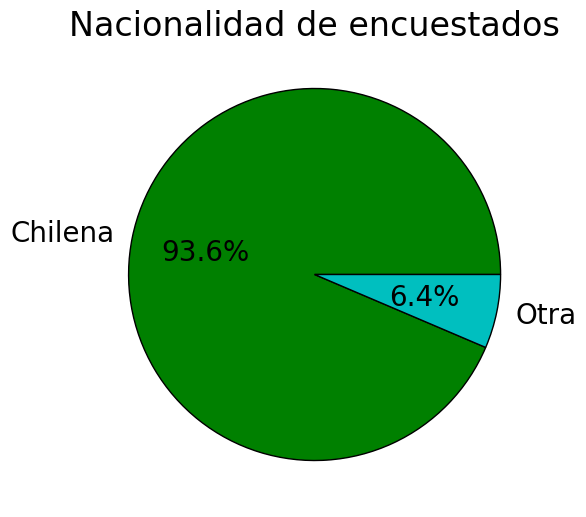

In [142]:
data_complete['¿Cuál es su nacionalidad?'].value_counts().plot.pie(colors=['g','c'],autopct='%.1f%%', fontsize=20, figsize=(6, 6))
plt.title('Nacionalidad de encuestados', fontsize=24)
plt.axes().set_ylabel('')
plt.savefig('ditribucion_nacionalidad.pdf', bbox_inches='tight')

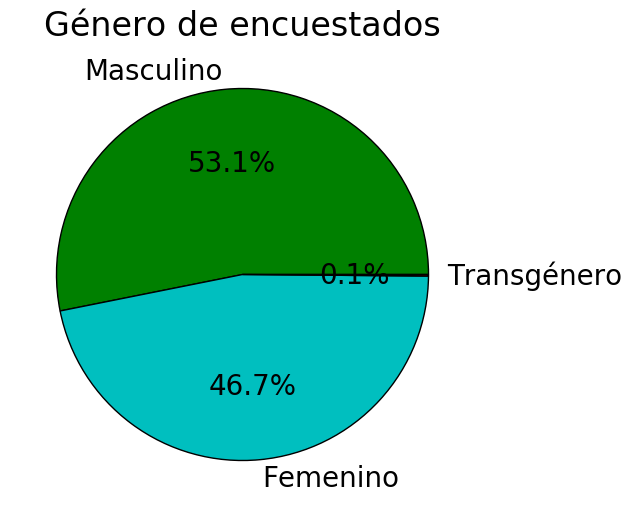

In [143]:
data_complete['Género'].value_counts().plot.pie(colors=['g','c','r'],autopct='%.1f%%', fontsize=20, figsize=(6, 6))
plt.title('Género de encuestados', fontsize=24)
plt.axes().set_ylabel('')
plt.savefig('ditribucion_genero.pdf', bbox_inches='tight')

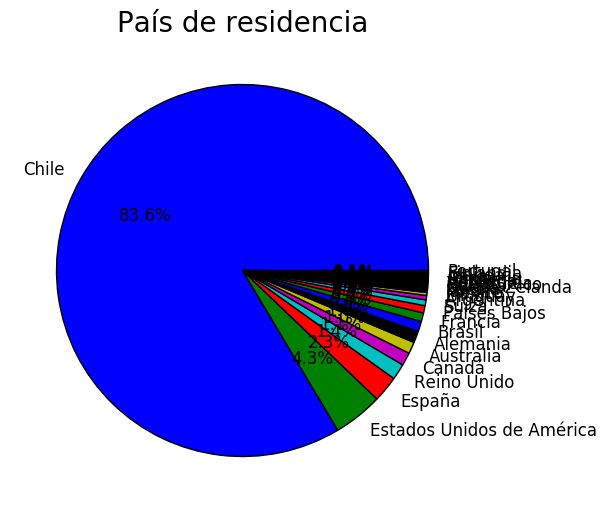

In [144]:
data_complete['pais residencia'].value_counts().plot.pie(autopct='%.1f%%', fontsize=12, figsize=(6, 6))
plt.title('País de residencia', fontsize=20)
plt.axes().set_ylabel('')
plt.savefig('ditribucion_pais.pdf', bbox_inches='tight')

In [55]:
d1=data_complete['¿Está cursando actualmente algún programa de Postgrado ya sea en Chile o el Extranjero?'].value_counts()
d2=data_complete['¿Tiene ya algún grado académico de Postgrado obtenido ya sea en Chile o el Extranjero?'].value_counts()
d3=data_complete['¿Está haciendo actualmente algún Postdoctorado ya sea en Chile o el Extranjero?'].value_counts()
d4=data_complete['¿Terminó ya algún Postdoctorado ya sea en Chile o el Extranjero?'].value_counts()
data_graduate=pd.concat([d1,d2,d3,d4])

In [56]:
data_graduate

No    581
Sí    183
Sí    673
No     91
No    594
Sí    170
No    569
Sí    195
dtype: int64

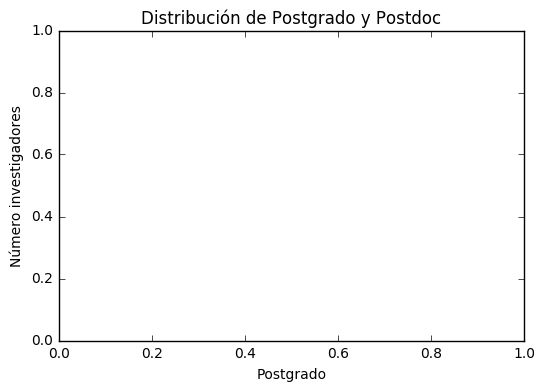

In [73]:
plt.figure()
#data_complete[['¿Está cursando actualmente algún programa de Postgrado ya sea en Chile o el Extranjero?','¿Tiene ya algún grado académico de Postgrado obtenido ya sea en Chile o el Extranjero?']].value_counts().plot.bar(stacked=True)
plt.title('Distribución etaria de los encuestados')
plt.xlabel('Postgrado')
plt.ylabel('Número investigadores')
plt.title('Distribución de Postgrado y Postdoc')

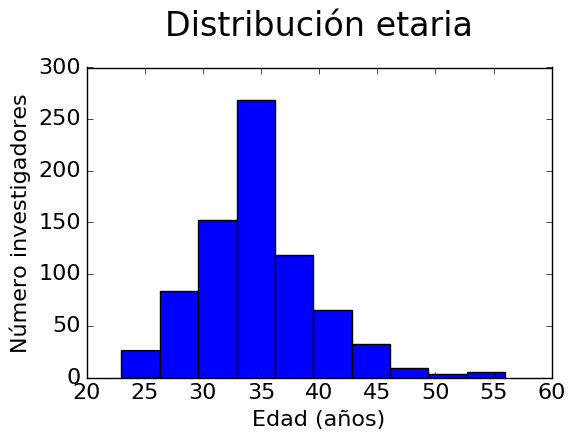

In [68]:
plt.figure()
data_complete['¿Cuál es su edad? Exprésela en años'].plot.hist(fontsize=16)
plt.xlabel('Edad (años)', fontsize=16)
plt.ylabel('Número investigadores', fontsize=16)
plt.title('Distribución etaria', fontsize=24,  y=1.08)
plt.savefig('ditribucion_edad.pdf', bbox_inches='tight')

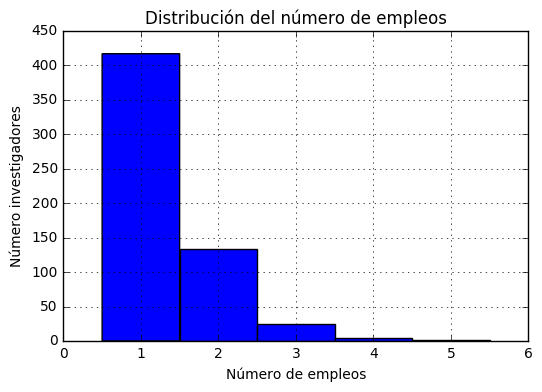

In [11]:
plt.figure()
data_complete_jobs['¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.'].hist(bins=5, range=(0.5,5.5))
plt.xlabel('Número de empleos')
plt.ylabel('Número investigadores')
plt.title('Distribución del número de empleos')

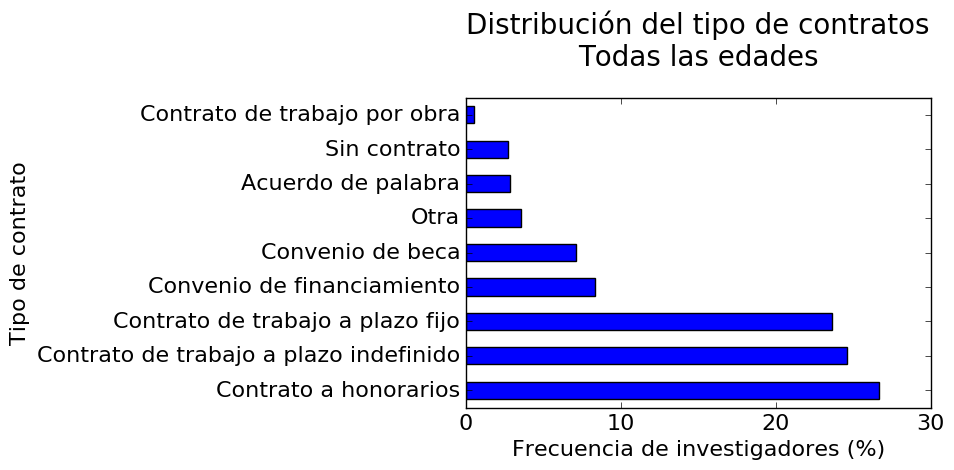

In [99]:
data_complete_jobs_age=data_complete_jobs['¿Qué tipo de relación laboral tiene en este trabajo?/1']

ax=(data_complete_jobs_age.value_counts()/len(data_complete_jobs_age)*100.).plot(kind='barh', fontsize=16)
ax.set_xticks(np.arange(0, 31, 10))

plt.ylabel('Tipo de contrato', fontsize=16)
plt.xlabel('Frecuencia de investigadores (%)', fontsize=16)
plt.title('Distribución del tipo de contratos\nTodas las edades', fontsize=20, y=1.08)
plt.savefig('ditribucion_tipo_contrato.pdf', bbox_inches='tight')

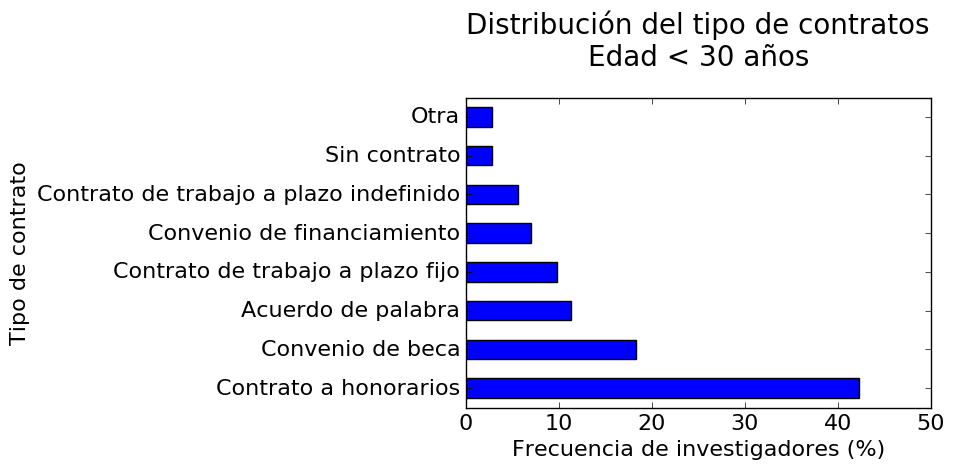

In [100]:
data_complete_jobs_age=data_complete_jobs['¿Qué tipo de relación laboral tiene en este trabajo?/1'][data_complete_jobs['¿Cuál es su edad? Exprésela en años'] < 30]

ax=(data_complete_jobs_age.value_counts()/len(data_complete_jobs_age)*100.).plot(kind='barh', fontsize=16)
ax.set_xticks(np.arange(0, 51, 10))

plt.ylabel('Tipo de contrato', fontsize=16)
plt.xlabel('Frecuencia de investigadores (%)', fontsize=16)
plt.title('Distribución del tipo de contratos\nEdad < 30 años', fontsize=20, y=1.08)
plt.savefig('ditribucion_tipo_contrato_edad<30.pdf', bbox_inches='tight')

#print('Número de investigadores: ', len(data_complete_jobs_age))

Número de investigadores:  219


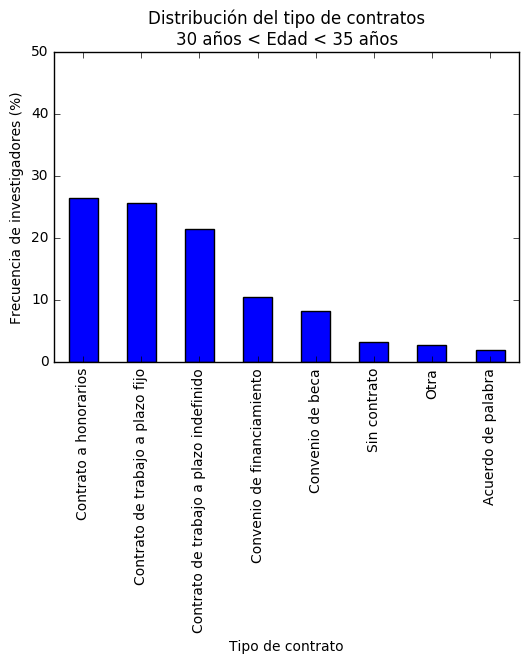

In [32]:
data_complete_jobs_age=data_complete_jobs['¿Qué tipo de relación laboral tiene en este trabajo?/1'][(data_complete_jobs['¿Cuál es su edad? Exprésela en años'] >=30) & (data_complete_jobs['¿Cuál es su edad? Exprésela en años'] <35)]

plt.figure()
ax=(data_complete_jobs_age.value_counts()/len(data_complete_jobs_age)*100.).plot(kind='bar')
ax.set_yticks(np.arange(0, 60, 10))
plt.xlabel('Tipo de contrato')
plt.ylabel('Frecuencia de investigadores (%)')
plt.title('Distribución del tipo de contratos\n30 años < Edad < 35 años')
plt.savefig('ditribucion_tipo_contratos_30<edad<35.pdf', bbox_inches='tight')

print('Número de investigadores: ', len(data_complete_jobs_age))

Número de investigadores:  199


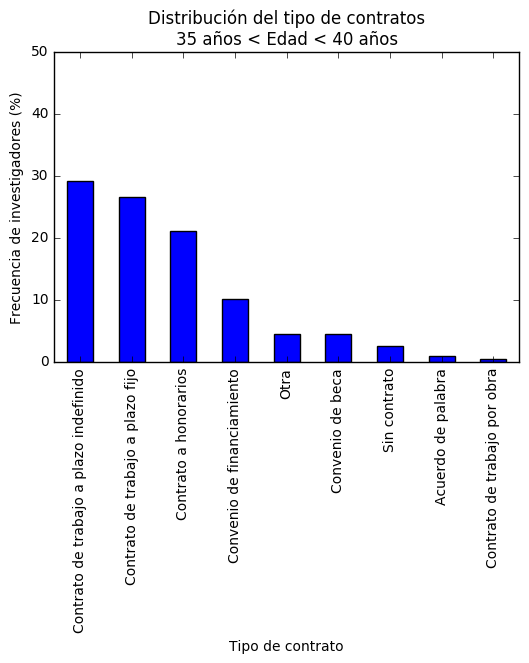

In [33]:
data_complete_jobs_age=data_complete_jobs['¿Qué tipo de relación laboral tiene en este trabajo?/1'][(data_complete_jobs['¿Cuál es su edad? Exprésela en años'] >=35) & (data_complete_jobs['¿Cuál es su edad? Exprésela en años'] <40)]

plt.figure()
ax=(data_complete_jobs_age.value_counts()/len(data_complete_jobs_age)*100.).plot(kind='bar')
ax.set_yticks(np.arange(0, 60, 10))
plt.xlabel('Tipo de contrato')
plt.ylabel('Frecuencia de investigadores (%)')
plt.title('Distribución del tipo de contratos\n35 años < Edad < 40 años')
plt.savefig('ditribucion_tipo_contratos_35<edad<40.pdf', bbox_inches='tight')

print('Número de investigadores: ', len(data_complete_jobs_age))

Número de investigadores:  93


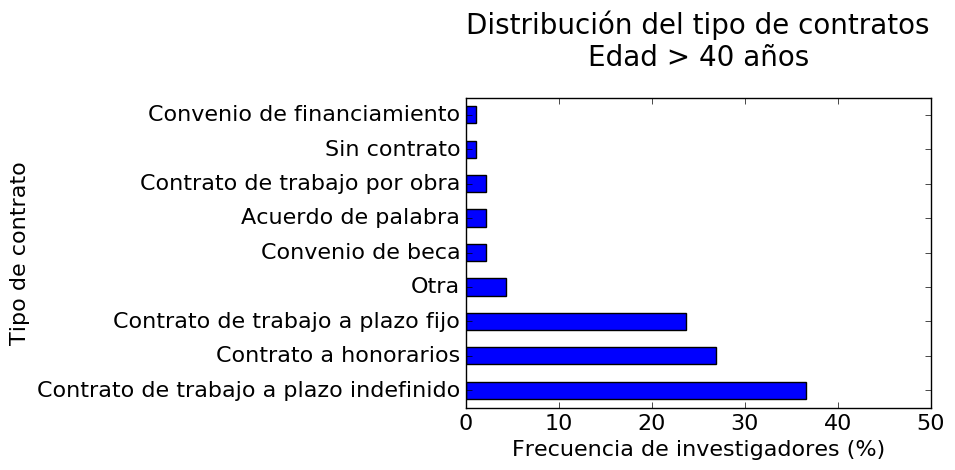

In [101]:
data_complete_jobs_age=data_complete_jobs['¿Qué tipo de relación laboral tiene en este trabajo?/1'][data_complete_jobs['¿Cuál es su edad? Exprésela en años'] >=40]

plt.figure()
ax=(data_complete_jobs_age.value_counts()/len(data_complete_jobs_age)*100.).plot(kind='barh', fontsize=16)
ax.set_xticks(np.arange(0, 51, 10))

plt.ylabel('Tipo de contrato', fontsize=16)
plt.xlabel('Frecuencia de investigadores (%)', fontsize=16)
plt.title('Distribución del tipo de contratos\nEdad > 40 años', fontsize=20, y=1.08)
plt.savefig('ditribucion_tipo_contrato_edad>40.pdf', bbox_inches='tight')

print('Número de investigadores: ', len(data_complete_jobs_age))

In [152]:
data_unemployed=data_complete[ (data_complete['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_complete['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_complete['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_complete.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_complete.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  42
Numero de total de investigadores:  791
Porcentaje:  5.3 %


In [153]:
data_age=data_complete[ data_complete['¿Cuál es su edad? Exprésela en años'] < 30]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  0
Numero de total de investigadores:  110
Porcentaje:  0.0 %


In [154]:
data_age=data_complete[ data_complete['¿Cuál es su edad? Exprésela en años'] < 35]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  13
Numero de total de investigadores:  396
Porcentaje:  3.3 %


In [155]:
data_age=data_complete[ data_complete['¿Cuál es su edad? Exprésela en años'] < 40]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  35
Numero de total de investigadores:  650
Porcentaje:  5.4 %


In [156]:
data_age=data_complete[ (data_complete['¿Cuál es su edad? Exprésela en años'] < 40) & (data_complete['Género'] == 'Femenino')]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Genero Femenino')
print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Genero Femenino
Numero de investigadores que se declaran desempleados:  21
Numero de total de investigadores:  303
Porcentaje:  6.9 %


In [157]:
data_age=data_complete[ (data_complete['¿Cuál es su edad? Exprésela en años'] < 40) & (data_complete['Género'] == 'Masculino')]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Genero Masculino')
print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Genero Masculino
Numero de investigadores que se declaran desempleados:  14
Numero de total de investigadores:  346
Porcentaje:  4.0 %
